## Install Necessary Libraries

In [1]:
# ! pip3 install torch
# ! pip3 install torchvision
# ! pip3 install pandas numpy matplotlib scikit-learn
# ! pip3 install --upgrade pip
# ! pip install torchinfo

## Milestones: 

- <a href="#problem"> Problem/case definition </a>

- <a href="#data-sourcing"> Data sourcing </a>

- <a href="#data-cleaning"> Data cleaning and preparation </a>

- <a href="#data-analysis"> Data Analysis and Exploration</a>

- <a href="#model-training"> Model training and Experimentations </a>

- <a href="#model-prediction"> Model serving and demonstration </a>

<p id="problem"></p>

# Problem/Case Definition

The most prevalent traffic issue is driver recklessness, which has become increasingly problematic as the number of vehicles on the road increases. The primary objective of Advanced Intelligent Transportation Systems (AITS) is to improve human safety and save lives. AITS are complex computer programmes that attempt to offer new capabilities connected to various modes of transportation and traffic management. It contributes to the automation, adaption, and improvement of the driving experience. <br>

<img src="https://storage.googleapis.com/kaggle-datasets-images/1014124/1710326/002ebdf428433a38826952887b0f8730/dataset-cover.jpg?t=2020-12-03-20-24-55">

<p id='data-sourcing'></p>

# Data sourcing 
The essential data was generated by simulating real-time driving with the Udacity Self-Driving Car Simulator software tool, which is meant to provide a virtual environment for learning and experimenting with autonomous driving. 

This enables us to design and test the self-driving algorithm without requiring physical vehicles. So far, we have generated around 20,000 rows of data for training the model. This data set includes 30,000 photos of simulated automobile driving in real-world settings including city streets, motorways, and crossings, allowing us to train and test our models in a safe yet relevant context.

Source: https://github.com/udacity/self-driving-car-sim

### Configuration
For planning and organising driving simulations, the programme includes unique graphic resolutions and quality options that are set before starting the simulations. 
<img src="assets/udacity_software_configuration.png" style="max-height: 40em"/>


The self driving programme comes in 2 modes:
- Training Mode: The training mode simulates real-world vehicle incidents. We may design scenarios to test and improve the effectiveness of our algorithms in challenging and unusual situations.
- Autonomous Mode: The autonomous mode is used to assess the result and performance of our model once it has been trained.
    
<img src="assets/udacity_software_mode_selection.png" style="max-height: 40em"/>

### Data Generation
- Images from the centre, left, and right cameras are recorded, together with the corresponding steering angle, speed, throttle, and brake.
- The data generated are saved to a CSV table **(data/driving_log.csv)** for analysis

<p id="data-cleaning"></p>

# Data cleaning and preparation

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('data/driving_log.csv', names=['center_img', 'left_img', 'right_img', 'steering', 'throttle', 'reverse', 'speed'])
data.head()

,center_img,left_img,right_img,steering,throttle,reverse,speed
0,/Users/cosmoremit/Documents/AcNice/MACHINE LEA...,/Users/cosmoremit/Documents/AcNice/MACHINE LE...,/Users/cosmoremit/Documents/AcNice/MACHINE LE...,0.0,0.0,0.0,0.000037
1,/Users/cosmoremit/Documents/AcNice/MACHINE LEA...,/Users/cosmoremit/Documents/AcNice/MACHINE LE...,/Users/cosmoremit/Documents/AcNice/MACHINE LE...,0.0,0.0,0.0,0.000040
2,/Users/cosmoremit/Documents/AcNice/MACHINE LEA...,/Users/cosmoremit/Documents/AcNice/MACHINE LE...,/Users/cosmoremit/Documents/AcNice/MACHINE LE...,0.0,0.0,0.0,0.000043
3,/Users/cosmoremit/Documents/AcNice/MACHINE LEA...,/Users/cosmoremit/Documents/AcNice/MACHINE LE...,/Users/cosmoremit/Documents/AcNice/MACHINE LE...,0.0,0.0,0.0,0.000070
4,/Users/cosmoremit/Documents/AcNice/MACHINE LEA...,/Users/cosmoremit/Documents/AcNice/MACHINE LE...,/Users/cosmoremit/Documents/AcNice/MACHINE LE...,0.0,0.0,0.0,0.000039


In [4]:
data.shape

(31117, 7)

In [5]:
# check for missing values
data.isna().sum()

center_img    0
left_img      0
right_img     0
steering      0
throttle      0
reverse       0
speed         0
dtype: int64

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31117 entries, 0 to 31116
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   center_img  31117 non-null  object 
 1   left_img    31117 non-null  object 
 2   right_img   31117 non-null  object 
 3   steering    31117 non-null  float64
 4   throttle    31117 non-null  float64
 5   reverse     31117 non-null  float64
 6   speed       31117 non-null  float64
dtypes: float64(4), object(3)
memory usage: 1.7+ MB


In [6]:
# Rename the file path in the center, left and right images columns
data['center_img'] = data['center_img'].str.strip('/Users/cosmoremit/Documents/AcNice/MACHINE LEARNING/CAR LANE DETECTION/')
data['left_img'] = data['left_img'].str.strip('/Users/cosmoremit/Documents/AcNice/MACHINE LEARNING/CAR LANE DETECTION/')
data['right_img'] = data['right_img'].str.strip('/Users/cosmoremit/Documents/AcNice/MACHINE LEARNING/CAR LANE DETECTION/')

In [7]:
data.head()

,center_img,left_img,right_img,steering,throttle,reverse,speed
0,data/IMG/center_2023_07_09_11_16_13_181.jpg,data/IMG/left_2023_07_09_11_16_13_181.jpg,data/IMG/right_2023_07_09_11_16_13_181.jpg,0.0,0.0,0.0,0.000037
1,data/IMG/center_2023_07_09_11_16_13_461.jpg,data/IMG/left_2023_07_09_11_16_13_461.jpg,data/IMG/right_2023_07_09_11_16_13_461.jpg,0.0,0.0,0.0,0.000040
2,data/IMG/center_2023_07_09_11_16_13_557.jpg,data/IMG/left_2023_07_09_11_16_13_557.jpg,data/IMG/right_2023_07_09_11_16_13_557.jpg,0.0,0.0,0.0,0.000043
3,data/IMG/center_2023_07_09_11_16_13_669.jpg,data/IMG/left_2023_07_09_11_16_13_669.jpg,data/IMG/right_2023_07_09_11_16_13_669.jpg,0.0,0.0,0.0,0.000070
4,data/IMG/center_2023_07_09_11_16_13_777.jpg,data/IMG/left_2023_07_09_11_16_13_777.jpg,data/IMG/right_2023_07_09_11_16_13_777.jpg,0.0,0.0,0.0,0.000039


<p id='data-analysis'></p>

# Data Analysis and Exploration

In [9]:
import os
import random
import matplotlib.pyplot as plt

IMAGES_PATH=os.path.join(os.getcwd(),'data/IMG')

def show_random_images(path=IMAGES_PATH):
    try:
        img_path = os.listdir(path)
        selected_img = random.sample(img_path, 4)
        
        # Create a 2x2 subplot grid
        fig, axs = plt.subplots(2, 2, figsize=(15, 7))
        
        # Iterate over the subplots and plot the selected images
        for i, ax in enumerate(axs.flat):
            image_path = os.path.join(path, selected_img[i])
            image = plt.imread(image_path)
            ax.imshow(image)
            ax.axis('off')
            ax.set_title(f'File Name: {selected_img[i]} \n Shape: {image.shape}')

        # Display the subplots
        plt.suptitle("Randomly Selected Images \n", fontsize=14)
        
        # Display the subplots
        plt.tight_layout()
        plt.show()
    except FileNotFoundError:
        print(f'No such file found in path {path}')

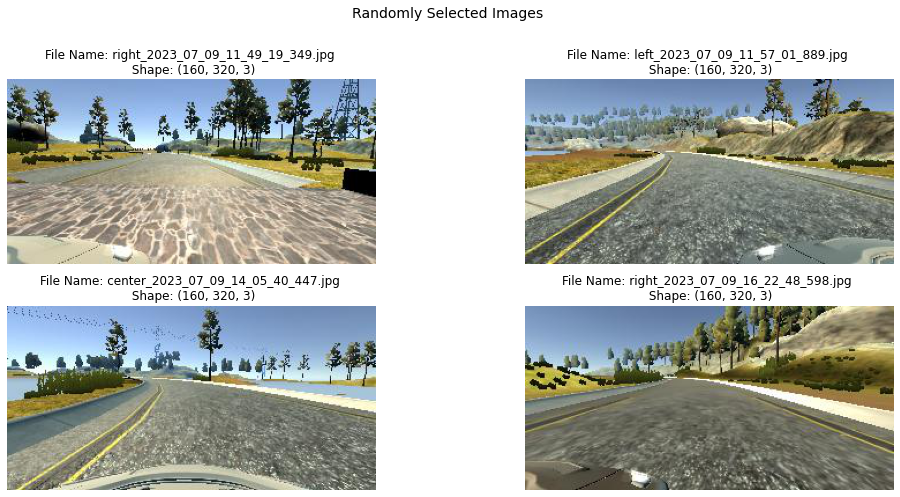

In [16]:
show_random_images()

## Data Augmentation

In [17]:
from torchvision import transforms

# Data Augmentation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    # Randomly flip the image horizontally
    transforms.RandomHorizontalFlip(),
    # Randomly adjust brightness, contrast, saturation, and hue
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),
    # Convert image to tensor
    transforms.ToTensor(),
])

In [18]:
from PIL import Image
from torch.utils.data import DataLoader, Dataset

class Data(Dataset):
    
    def __init__(self, data, transform=None, batch_size=32):
        self.data = data
        self.transform = transform

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        # Load the center, left and right image and steering angle at the given index
        center_image = Image.open(self.data['center_img'].iloc[idx])
        left_image = Image.open(self.data['left_img'].iloc[idx])
        right_image = Image.open(self.data['right_img'].iloc[idx])

        steering_angle = self.data['steering'].iloc[idx]

        # Apply the specified transformations, if any
        if self.transform:
            center_image = self.transform(center_image)
            left_image = self.transform(left_image)
            right_image = self.transform(right_image)

        return center_image, left_image, right_image, steering_angle
    


In [19]:
from sklearn.model_selection import train_test_split

# drop non-needed columns
new_data = data.drop(['throttle','reverse', 'speed'], axis=1)

# Load the data and create data loaders 
train_data, test_data = train_test_split(new_data, test_size=0.2, random_state=42)

# Training data
train_dataset = Data(train_data, transform=transform)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Test data
test_dataset = Data(test_data, transform=transforms.ToTensor())
test_dataloader = DataLoader(test_dataset, batch_size=32)

In [20]:
train_data.head()

,center_img,left_img,right_img,steering
13377,data/IMG/center_2023_07_09_14_01_59_428.jpg,data/IMG/left_2023_07_09_14_01_59_428.jpg,data/IMG/right_2023_07_09_14_01_59_428.jpg,0.000000
15192,data/IMG/center_2023_07_09_14_06_22_512.jpg,data/IMG/left_2023_07_09_14_06_22_512.jpg,data/IMG/right_2023_07_09_14_06_22_512.jpg,0.000000
3438,data/IMG/center_2023_07_09_11_28_56_413.jpg,data/IMG/left_2023_07_09_11_28_56_413.jpg,data/IMG/right_2023_07_09_11_28_56_413.jpg,0.000000
5427,data/IMG/center_2023_07_09_11_49_36_975.jpg,data/IMG/left_2023_07_09_11_49_36_975.jpg,data/IMG/right_2023_07_09_11_49_36_975.jpg,0.000000
103,data/IMG/center_2023_07_09_11_16_25_758.jpg,data/IMG/left_2023_07_09_11_16_25_758.jpg,data/IMG/right_2023_07_09_11_16_25_758.jpg,-0.088575


# Modeling

In [45]:
import torch
from torch import nn

class LaneDetectionModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Define convolutional layers
        self.conv_layers = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=24, kernel_size=5, stride=2),
            nn.ELU(),
            nn.Conv2d(in_channels=24, out_channels=36, kernel_size=5, stride=2),
            nn.ELU(),
            nn.Conv2d(in_channels=36, out_channels=48, kernel_size=5, stride=2),
            nn.ELU(),
            nn.Conv2d(in_channels=48, out_channels=64, kernel_size=3),
            nn.ELU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3),
            nn.ELU(),
        )

        # Define the fully connected (fc) layers
        self.fc_layers = nn.Sequential(
            nn.Dropout(),
#             nn.Flatten(),
#             nn.Linear(84672, 100), # Multiply by 3 since we have 3 images (center, left, and right)
            nn.ELU(),
            nn.Linear(100, 50),
            nn.ELU(),
            nn.Linear(50, 10),
            nn.ELU(),
            nn.Linear(10, 1)
        )

    def forward(self, center, left, right):
        #Parse the center image
        center_img_out = self.conv_layers(center)
        center_img_out = center_img_out.view(center_img_out.size(0), -1)
        
        #Parse the left image
        left_img_out = self.conv_layers(left)
        left_img_out = left_img_out.view(left_img_out.size(0), -1)

        #Parse the right image
        right_img_out = self.conv_layers(right)
        right_img_out = right_img_out.view(right_img_out.size(0), -1)

        # Concatenate outputs of center, left, and right images
        concatenated = torch.cat((center_img_out, left_img_out, right_img_out), dim=1)

        # Final output for steering angle prediction
        steering_out = self.fc_layers(concatenated)

        return steering_out

In [46]:
# Initialize the model and other components
model = LaneDetectionModel()
loss_func = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [47]:
# Setup device training
device = "cuda" if torch.cuda.is_available() else "cpu"

In [131]:
EPOCHS = 10
epoch_count0 = []
train_loss_values0 = []
model0 = LaneDetectionModel()

for epoch in range(1,EPOCHS):
    for center_images0, left_images0, right_images0, steering_angles0 in train_dataloader:
        
        # Move data to device (CPU/GPU)
        center_images0 = center_images0.to(device)
        left_images0 = left_images0.to(device)
        right_images0 = right_images0.to(device)
        steering_angles0 = steering_angles0.to(device)
        
        y_pred0 = model0(center_images0, left_images0, right_images0)
        
        # Calculate the total loss
        train_loss0 = loss_func(y_pred, steering_angles0.unsqueeze(1))
        
        # Optimizer zero grad
        optimizer.zero_grad()
    
        # Back propagation on the loss
        train_loss0.backward()
    
        # Perform gradient descent
        optimizer.step()
    
#     if epoch % 10 == 0:
    epoch_count0.append(epoch)
    train_loss_values0.append(torch.tensor(train_loss0).cpu().numpy())
    print(f'Epochs: {epoch} | Train loss: {train_loss0}')

/opt/anaconda3/lib/python3.8/site-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([29, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


RuntimeError: The size of tensor a (29) must match the size of tensor b (32) at non-singleton dimension 0

### Train the model

In [48]:
EPOCHS = 10
epoch_count = []
train_loss_values = []

for epoch in range(1,EPOCHS):
    for center_images, left_images, right_images, steering_angles in train_dataloader:
        
        # Move data to device (CPU/GPU)
        center_images = center_images.to(device)
        left_images = left_images.to(device)
        right_images = right_images.to(device)
        steering_angles = steering_angles.to(device)
        
        y_pred = model(center_images, left_images, right_images)
        
        # Calculate the total loss
        train_loss = loss_func(y_pred, steering_angles.unsqueeze(1))
        
        # Optimizer zero grad
        optimizer.zero_grad()
    
        # Back propagation on the loss
        train_loss.backward()
    
        # Perform gradient descent
        optimizer.step()
    
#     if epoch % 10 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(torch.tensor(train_loss).cpu().numpy())
    print(f'Epochs: {epoch} | Train loss: {train_loss}')

/var/folders/zf/nmlxjncx1y1dzrhzmb_8dm700000gn/T/ipykernel_50257/1507539691.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_loss_values.append(torch.tensor(train_loss).cpu().numpy())


Epochs: 1 | Train loss: 0.14770908382727507
Epochs: 2 | Train loss: 0.1645341980992313
Epochs: 3 | Train loss: 0.112198644889688
Epochs: 4 | Train loss: 0.1450823548902986
Epochs: 5 | Train loss: 0.19353507628675987
Epochs: 6 | Train loss: 0.20277258454374747
Epochs: 7 | Train loss: 0.28650952400539187
Epochs: 8 | Train loss: 0.2042232962112787
Epochs: 9 | Train loss: 0.12970114527290935


In [52]:
try: 
    import torchinfo
except:
    import torchinfo
    
from torchinfo import summary
summary(model)

Layer (type:depth-idx)                   Param #
LaneDetectionModel                       --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       1,824
│    └─ELU: 2-2                          --
│    └─Conv2d: 2-3                       21,636
│    └─ELU: 2-4                          --
│    └─Conv2d: 2-5                       43,248
│    └─ELU: 2-6                          --
│    └─Conv2d: 2-7                       27,712
│    └─ELU: 2-8                          --
│    └─Conv2d: 2-9                       36,928
│    └─ELU: 2-10                         --
├─Sequential: 1-2                        --
│    └─Dropout: 2-11                     --
│    └─Flatten: 2-12                     --
│    └─Linear: 2-13                      8,467,300
│    └─ELU: 2-14                         --
│    └─Linear: 2-15                      5,050
│    └─ELU: 2-16                         --
│    └─Linear: 2-17                      510
│    └─ELU: 2-18                         

In [76]:
train_loss_values = [i.item() for i in train_loss_values]

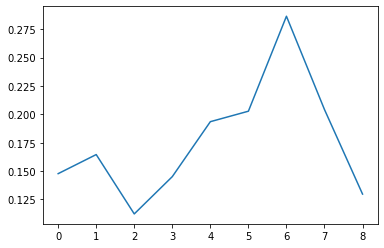

In [112]:
plt.plot(train_loss_values);

In [114]:
def plot_preds(X_train, y_train, X_test, y_test, y_pred=None):
    
    plt.figure(figsize=(15,7))
    
    #Plot training data
    plt.plot(X_train, y_train, c='b', s=4, label='Training data')
    
    #Plot testing data
    plt.plot(X_test, y_test, c='g', s=4, label='Testing data')
    
    #plot preds
    if y_pred is not None:
        plt.plot(X_test, y_pred, c='r', s=4, label='Prediction')
    
    plt.legend(prop={'size':14});

### Test the model

In [130]:
epoch_count = []
test_loss_values = []

for epoch in range(1,EPOCHS):
    for test_center_images, test_left_images, test_right_images, test_steering_angles in test_dataloader:
     
        # Turn on gradient tracking
        model.eval()
        with torch.inference_mode():   
            # Move data to device (CPU/GPU)
            center_images = test_center_images.to(device)
            left_images = test_left_images.to(device)
            right_images = test_right_images.to(device)
            steering_angles = test_steering_angles.to(device)

            test_pred = model(center_images, left_images, right_images)
        
            # Calculate the total loss
            test_loss = loss_func(test_pred, steering_angles.unsqueeze(1))
        
#     if epoch % 10 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(torch.tensor(test_loss).cpu().numpy())
    print(f'Epochs: {epoch} | Train loss: {test_loss}')

RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x82368 and 84672x100)

## Save the model

In [54]:
from pathlib import Path

model_path = Path('models')
model_path.mkdir(parents=True, exist_ok=True)

model_name = 'model_01.pth'
model_save_path = model_path/model_name

torch.save(obj=model.state_dict(), f=model_save_path)

In [42]:
# Train our model

EPOCHS = 100

epoch_count = []
train_loss_values = []
test_loss_values = []

for epoch in range(EPOCHS):
    
    # Set the model to training mode
    model.train()
    
    # Forward pass
    y_pred = model(X_train)
    
    # Calculate the (MAE) loss
    train_loss = loss_func(y_pred, y_train)

    # Optimizer zero grad
    optimizer.zero_grad()
    
    # Back propagation on the loss
    train_loss.backward()
    
    # Perform gradient descent
    optimizer.step()
    
    
    
    # Turn on gradient tracking
    model.eval()
    with torch.inference_mode():
        test_pred = model(X_test)
        
        test_loss = loss_func(test_pred, y_test)
        
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(torch.tensor(train_loss).cpu().numpy())
        test_loss_values.append(test_loss)
        print(f'Epochs: {epoch} | Train loss: {train_loss} | Test loss: {test_loss}')
        print(model.state_dict())

NameError: name 'X_train' is not defined

In [ ]:
def plot_loss_and_validation(history):
    loss = history['loss']
    val_loss = history['val_loss']

    # Get the number of epochs
    epochs = range(1, len(loss) + 1)

    # Plot the training and validation loss curves
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

<p id="model-prediction"></p>

# Model Serving and Demostration

In [ ]:
model = LinearRegressionModel_0()
model.load_state_dict(torch.load(model_save_path))
model.eval()

In [ ]:
torch.nn.Module.load_state_dict()